<a href="https://colab.research.google.com/github/ConstanzaRB/Trabajo-Final-Finanzas-lll/blob/main/Trabajo_Final_Finanzas_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabajo Final Finanzas III**

Integrantes: Macarena Ramos, Constanza Rodriguez, Marcelo Tiznado y Maura Zuñiga

Realizar valoraciones a distintos tipos de activos financieros:

1- Bonos

2- Acciones

3- Futuros

4- Forward

5- Opciones

6- Swaps

7- Fra

8- Otro instrumento financiero



Estructura del trabajo:

1-
. El trabajo debe ser realizado en el sitio web de colaboratory de Python y
debe contener los códigos y librerías necesarias para que ejecute la valoración
de cada uno de los activos descritos anteriormente. Para esto puede utilizar
un ejemplo o ejercicio del libro o bien ocupar un ejercicio de la clase.
Son 7 tipos de activos financieros (1 punto por cada activo) y debe mostrar los
cálculos, gráficas obtenidos y un documento que resuma los datos
(rentabilidades, riesgo, según corresponda).


# **1.- Bonos**

**Ejercicio 1: Valoración de un Bono Corportivo de Tesla**
Supón que deseas calcular el valor de un bono emitido por Tesla Inc.. El bono tiene las siguientes características:

Valor nominal (
𝑉
𝑛
V
n
​
 ): 1,000 USD

Tasa de cupón (
𝐶
C): 5.3% anual

Fecha de emisión: 18 de agosto de 2017

Fecha de vencimiento: 15 de agosto de 2025

Frecuencia de pagos de cupones: Semestral (dos pagos al año)

Precio actual del bono (
𝑃
0
​
 ): 1,026.40 USD (según datos históricos)

Tasa de descuento (
𝑟
r): 5% anual (tasa de rendimiento requerida en el mercado)

Años restantes hasta el vencimiento: 4 años

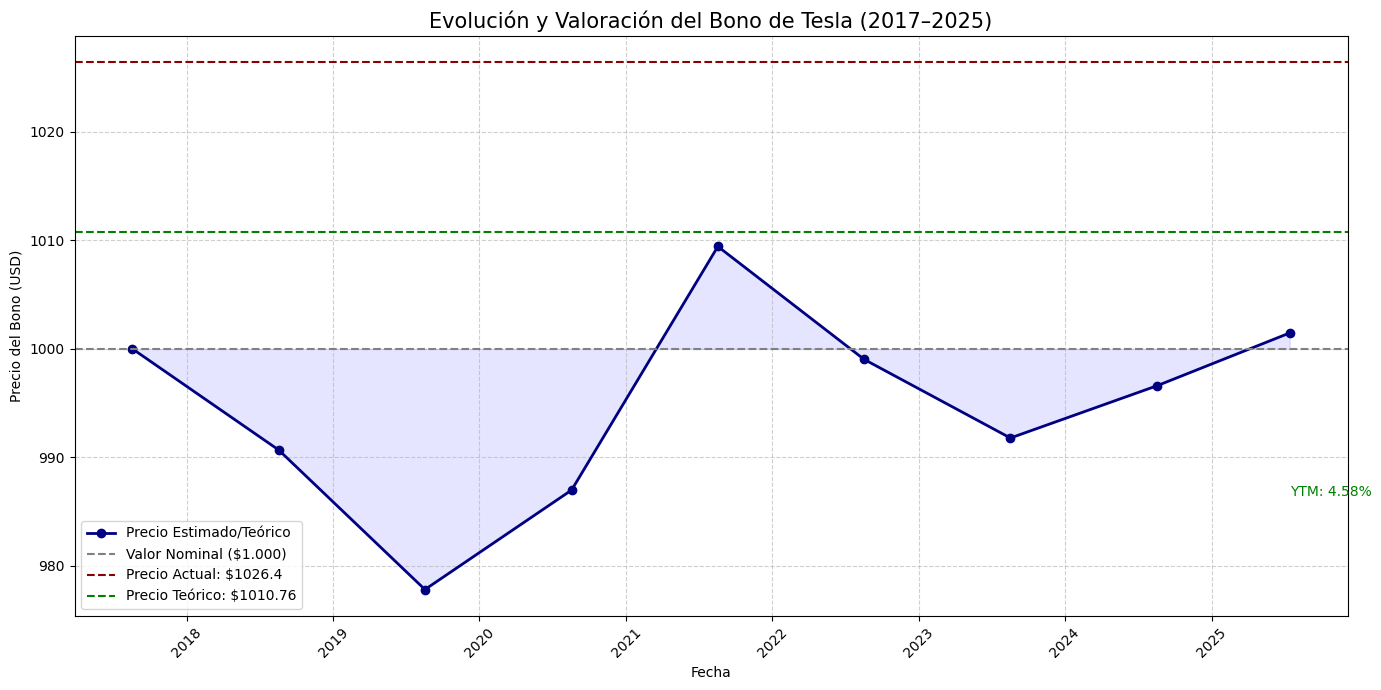


 Resumen Financiero del Bono Tesla:
 Precio Actual  Precio Teórico  Current Yield (%)  YTM Aproximado (%)
        1026.4     1010.755206           5.163679             4.57955

Análisis del bono:
El precio teórico del bono, calculado con una tasa de descuento del 5%, es de $1010.76.
El precio actual de mercado es de $1026.40, lo que indica que el bono se encuentra ligeramente sobrevalorado respecto a su valor intrínseco.
El rendimiento corriente (CY) es de 5.16%, mientras que el rendimiento al vencimiento (YTM) aproximado es de 4.58%.
La comparación entre estos indicadores sugiere que, a pesar de su precio sobre par, el bono sigue ofreciendo un retorno competitivo.
Visualmente, la curva muestra cómo el precio del bono converge hacia su valor nominal a medida que se acerca el vencimiento en 2025.


In [ ]:
# Instalar librerías necesarias si no están instaladas
!pip install matplotlib pandas numpy

# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# ------------------------
# PARTE 1: PARÁMETROS DEL BONO
# ------------------------

valor_nominal = 1000                     # Valor nominal del bono
tasa_cupon = 0.053                       # Tasa de cupón anual (5.3%)
frecuencia_pago = 2                      # Semestral
cupon = valor_nominal * tasa_cupon / frecuencia_pago
precio_actual_bono = 1026.40            # Precio actual en el mercado
anos_restantes = 4
tasa_descuento = 0.05                   # Tasa de descuento (5% anual)
n = anos_restantes * frecuencia_pago    # Número de pagos restantes

# ------------------------
# PARTE 2: CÁLCULO DEL PRECIO TEÓRICO
# ------------------------

flujos_cupon = np.array([cupon / (1 + tasa_descuento / frecuencia_pago)**i for i in range(1, n + 1)])
valor_presente_vn = valor_nominal / (1 + tasa_descuento / frecuencia_pago)**n
precio_teorico_bono = np.sum(flujos_cupon) + valor_presente_vn

# ------------------------
# PARTE 3: INDICADORES FINANCIEROS
# ------------------------

ytm_aprox = frecuencia_pago * (cupon + (valor_nominal - precio_actual_bono) / n) / ((valor_nominal + precio_actual_bono) / 2)
cy = (cupon * frecuencia_pago) / precio_actual_bono

# ------------------------
# PARTE 4: SIMULACIÓN DE PRECIOS EN EL TIEMPO
# ------------------------

fechas = pd.to_datetime(['2017-08-18', '2018-08-18', '2019-08-18', '2020-08-18',
                         '2021-08-18', '2022-08-18', '2023-08-18', '2024-08-18', '2025-07-15'])

tasas_estimadas = [0.053, 0.058, 0.065, 0.060, 0.048, 0.055, 0.070, 0.060, tasa_descuento]
precios_est = []

for i, r in enumerate(tasas_estimadas):
    n_restantes = max(1, (len(tasas_estimadas) - i) * frecuencia_pago // len(tasas_estimadas) * anos_restantes)
    pagos = [cupon / (1 + r / frecuencia_pago)**t for t in range(1, n_restantes + 1)]
    valor_final = valor_nominal / (1 + r / frecuencia_pago)**n_restantes
    precios_est.append(sum(pagos) + valor_final)

df = pd.DataFrame({
    'Fecha': fechas,
    'Precio Estimado del Bono': precios_est
})

# ------------------------
# PARTE 5: TABLA DE RESUMEN
# ------------------------

resumen = pd.DataFrame({
    'Precio Actual': [precio_actual_bono],
    'Precio Teórico': [precio_teorico_bono],
    'Current Yield (%)': [cy * 100],
    'YTM Aproximado (%)': [ytm_aprox * 100]
})

# ------------------------
# PARTE 6: GRÁFICO DEL BONO
# ------------------------

plt.figure(figsize=(14, 7))
plt.plot(df['Fecha'], df['Precio Estimado del Bono'], color='navy', marker='o', linewidth=2, label='Precio Estimado/Teórico')
plt.axhline(y=valor_nominal, color='gray', linestyle='--', label='Valor Nominal ($1.000)')
plt.axhline(y=precio_actual_bono, color='darkred', linestyle='--', label=f'Precio Actual: ${precio_actual_bono}')
plt.axhline(y=precio_teorico_bono, color='green', linestyle='--', label=f'Precio Teórico: ${precio_teorico_bono:.2f}')
plt.fill_between(df['Fecha'], df['Precio Estimado del Bono'], valor_nominal, color='blue', alpha=0.1)

plt.annotate(f"CY: {cy*100:.2f}%", (df['Fecha'].iloc[-1], precio_actual_bono + 15), color='darkred', fontsize=10)
plt.annotate(f"YTM: {ytm_aprox*100:.2f}%", (df['Fecha'].iloc[-1], precio_actual_bono - 40), color='green', fontsize=10)

plt.title('Evolución y Valoración del Bono de Tesla (2017–2025)', fontsize=15)
plt.xlabel('Fecha')
plt.ylabel('Precio del Bono (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------------
# PARTE 7: MOSTRAR TABLA Y ANÁLISIS
# ------------------------

print("\n Resumen Financiero del Bono Tesla:")
print(resumen.to_string(index=False))

print("\nAnálisis del bono:")
print(f"El precio teórico del bono, calculado con una tasa de descuento del 5%, es de ${precio_teorico_bono:.2f}.")
print(f"El precio actual de mercado es de ${precio_actual_bono:.2f}, lo que indica que el bono se encuentra ligeramente sobrevalorado respecto a su valor intrínseco.")
print(f"El rendimiento corriente (CY) es de {cy*100:.2f}%, mientras que el rendimiento al vencimiento (YTM) aproximado es de {ytm_aprox*100:.2f}%.")
print("La comparación entre estos indicadores sugiere que, a pesar de su precio sobre par, el bono sigue ofreciendo un retorno competitivo.")
print("Visualmente, la curva muestra cómo el precio del bono converge hacia su valor nominal a medida que se acerca el vencimiento en 2025.")


# **2.- Acciones**

Calcular y analizar la rentabilidad y el riesgo de la acción de Google (GOOG) durante los últimos 5 años con frecuencia semanal, basándose en datos históricos. Se debe visualizar el comportamiento del precio de la acción, rentabilidad, desviación estándar o riesgo. En el gráfico, debe incluir medias móviles y los puntos máximos y mínimos del periodo.

/tmp/ipython-input-33-2202980246.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="5y", interval="1wk")
[*********************100%***********************]  1 of 1 completed


,Ticker,Close,High,Low,Open,Volume,Rentabilidad
Date,,,,,,,
2020-07-13,GOOG,75.329727,75.721897,73.876368,74.556825,59520000,NaN
2020-07-20,GOOG,75.146812,78.880622,73.980247,75.315313,137542000,-0.002428
2020-07-27,GOOG,73.709854,76.593212,72.271899,75.332207,183320000,-0.019122
2020-08-03,GOOG,74.282951,75.394091,72.501541,73.892769,195728000,0.007775
2020-08-10,GOOG,74.941048,76.408332,73.218787,73.919623,139814000,0.008859
...,...,...,...,...,...,...,...
2025-06-16,GOOG,167.729996,178.714996,166.270004,175.904999,123723000,-0.045192
2025-06-23,GOOG,178.270004,178.839996,163.330002,167.320007,187875500,0.062839
2025-06-30,GOOG,180.550003,181.580002,174.660004,180.785004,102356400,0.012790


,Rentabilidad Promedio (%),Riesgo (Desviación Estándar %)
0,0.429786,4.211116



Rentabilidad Promedio: La rentabilidad promedio de la acción es 0.430%, lo que indica que, en promedio, el valor de la acción ha subido un 0.430% semanalmente durante los últimos 5 años. Este dato sugiere que la acción ha tenido un rendimiento positivo, aunque con fluctuaciones.

Desviación Estándar (Riesgo): El riesgo de la acción es 4.211%, lo que indica que los precios de la acción tienen una volatilidad moderada. Un valor más alto significaría que los precios varían más, lo que implica mayor incertidumbre para los inversores.


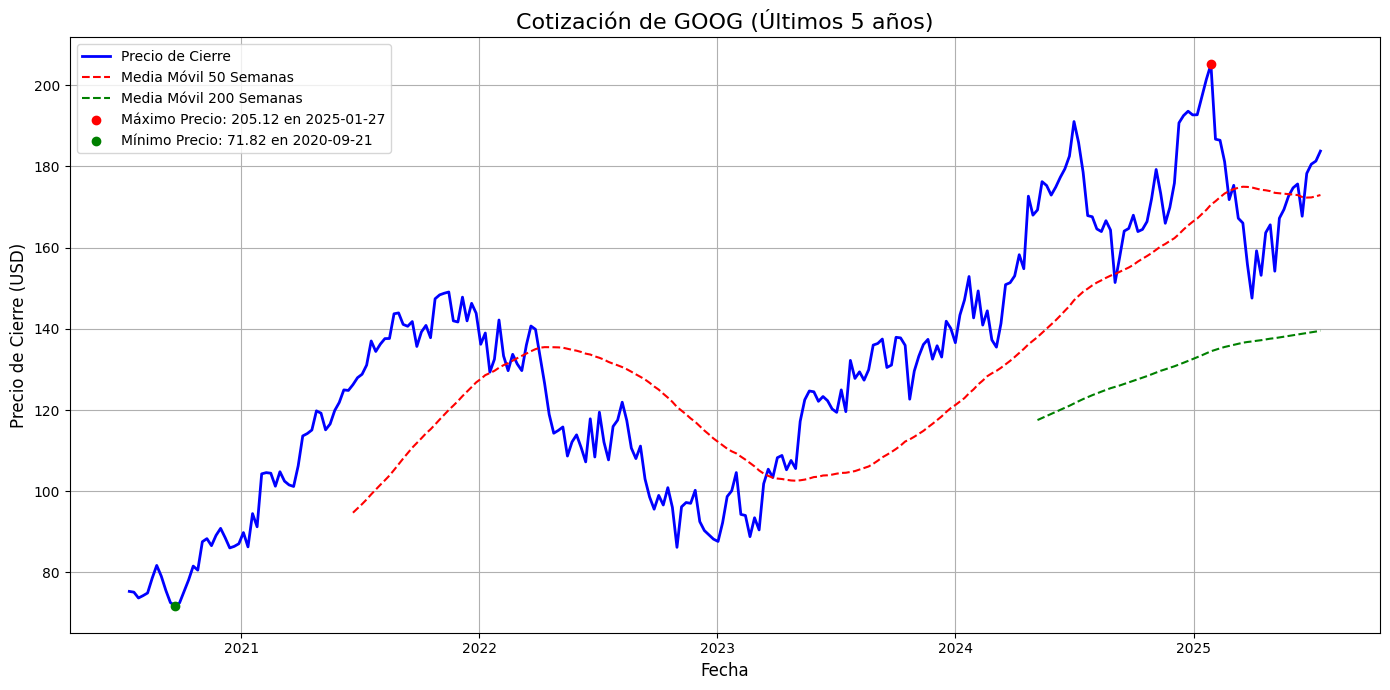


Comportamiento de la acción:
El gráfico muestra una tendencia creciente en el precio de cierre de Google (GOOG) durante los últimos 5 años, especialmente desde 2020, lo que sugiere un crecimiento impulsado por el éxito en áreas como tecnología, publicidad y la nube.

Medias Móviles:
La MMA50 (línea roja) indica la tendencia a corto plazo y sugiere un momento alcista cuando está por encima del precio de cierre. La MMA200 (línea verde) refleja la tendencia a largo plazo, y un precio por encima de ella indica una tendencia positiva.

Puntos máximos y mínimos:
El punto máximo (rojo) ocurrió el 2025-01-27 con 205.12 USD, posiblemente impulsado por un evento positivo.
El punto mínimo (verde) fue el 2020-09-21 con 71.82 USD, afectado probablemente por la pandemia de COVID-19.


In [ ]:
#2.- Acciones

 # Instalar yfinance
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Elegir y Descargar los datos de los últimos 5 años con frecuencia semanal
ticker = "GOOG"
data = yf.download(ticker, period="5y", interval="1wk")

# Calcular la rentabilidad con los precios de cierre.
data['Rentabilidad'] = data['Close'].pct_change()
# Crear una tabla con más detalles (precios de cierre, máximos, mínimos, etc.)
tabla = pd.concat([data['Close'], data['High'], data['Low'], data['Open'], data['Volume'], data['Rentabilidad']], axis=1)
tabla.columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'Rentabilidad']
tabla['Ticker'] = ticker
tabla = tabla[['Ticker', 'Close', 'High', 'Low', 'Open', 'Volume', 'Rentabilidad']]

display(tabla)

# Realizar un resumen de la rentabilidad promedio y con su respectivo riesgo (desviación estándar).
rentabilidad_promedio = data['Rentabilidad'].mean()
riesgo = data['Rentabilidad'].std()

# Resumen
resumen = pd.DataFrame({
    'Rentabilidad Promedio (%)': [rentabilidad_promedio * 100],
    'Riesgo (Desviación Estándar %)': [riesgo * 100]
})

display(resumen)

#Explicación de rentabilidad y riesgo
print("\nRentabilidad Promedio: La rentabilidad promedio de la acción es {:.3f}%, lo que indica que, en promedio, el valor de la acción ha subido un {:.3f}% semanalmente durante los últimos 5 años. Este dato sugiere que la acción ha tenido un rendimiento positivo, aunque con fluctuaciones.".format(rentabilidad_promedio * 100, rentabilidad_promedio * 100))
print("\nDesviación Estándar (Riesgo): El riesgo de la acción es {:.3f}%, lo que indica que los precios de la acción tienen una volatilidad moderada. Un valor más alto significaría que los precios varían más, lo que implica mayor incertidumbre para los inversores.".format(riesgo * 100))

# 5. Graficar la cotización del periodo señalado (en un gráfico de línea con los precios de cierre).
plt.figure(figsize=(14, 7))

# Graficar los precios de cierre
plt.plot(data['Close'], label='Precio de Cierre', color='b', linewidth=2)

# Añadir una media móvil de 50 semanas
data['SMA50'] = data['Close'].rolling(window=50).mean()
plt.plot(data['SMA50'], label='Media Móvil 50 Semanas', linestyle='--', color='r')

# Añadir una media móvil de 200 semanas
data['SMA200'] = data['Close'].rolling(window=200).mean()
plt.plot(data['SMA200'], label='Media Móvil 200 Semanas', linestyle='--', color='g')

# Obtener el precio máximo y mínimo y sus respectivas fechas
max_price = data['Close'].max()
min_price = data['Close'].min()

# Obtener las fechas correspondientes al máximo y mínimo (en formato datetime)
max_date = data['Close'].idxmax()  # El índice de la fecha con el precio máximo
min_date = data['Close'].idxmin()  # El índice de la fecha con el precio mínimo

# Asegurarnos de que las fechas sean valores individuales y no series
max_date_scalar = max_date.iloc[0]
min_date_scalar = min_date.iloc[0]

max_price_scalar = max_price.iloc[0]
min_price_scalar = min_price.iloc[0]

max_date_str = max_date_scalar.strftime('%Y-%m-%d')
min_date_str = min_date_scalar.strftime('%Y-%m-%d')


# Graficar los precios máximos y mínimos con etiquetas
plt.scatter(max_date_scalar, max_price_scalar, color='red', zorder=5, label=f'Máximo Precio: {max_price_scalar:.2f} en {max_date_str}')
plt.scatter(min_date_scalar, min_price_scalar, color='green', zorder=5, label=f'Mínimo Precio: {min_price_scalar:.2f} en {min_date_str}')

# Añadir título, etiquetas y leyenda
plt.title(f'Cotización de {ticker} (Últimos 5 años)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de Cierre (USD)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Imprimir la explicación del gráfico
print("\nComportamiento de la acción:")
print("El gráfico muestra una tendencia creciente en el precio de cierre de Google (GOOG) durante los últimos 5 años, especialmente desde 2020, lo que sugiere un crecimiento impulsado por el éxito en áreas como tecnología, publicidad y la nube.")
print("\nMedias Móviles:")
print("La MMA50 (línea roja) indica la tendencia a corto plazo y sugiere un momento alcista cuando está por encima del precio de cierre. La MMA200 (línea verde) refleja la tendencia a largo plazo, y un precio por encima de ella indica una tendencia positiva.")
print("\nPuntos máximos y mínimos:")
print(f"El punto máximo (rojo) ocurrió el {max_date_str} con {max_price_scalar:.2f} USD, posiblemente impulsado por un evento positivo.")
print(f"El punto mínimo (verde) fue el {min_date_str} con {min_price_scalar:.2f} USD, afectado probablemente por la pandemia de COVID-19.")

# **3.- Futuros**

Cobertura larga
Hoy es 15 de enero. Un fabricante de cobre sabe que requerirá 100 mil libras de cobre el 15 de mayo para cumplir con un contrato determinado. El precio spot del cobre es de 3.40 por libra y el precio de futuros de mayo es de 3.20 por libra.

El fabricante de cobre puede cubrir con las transacciones siguientes:
 15 de enero: tomar una posición larga en cuatro contratos de futuros de cobre de mayo
 15 de mayo: cerrar la posición

Después de tomar en cuenta las ganancias o pérdidas obtenidas de los contratos de futuros, el precio pagado por la empresa es cercano a $3.20 por libra.

,Precio Spot en Mayo (USD por libra),Ganancia/Pérdida de la Cobertura en Futuros (USD)
0,3.00,-20000.00
1,3.07,-13333.33
2,3.13,-6666.67
3,3.20,0.00
4,3.27,6666.67
5,3.33,13333.33
6,3.40,20000.00
7,3.47,26666.67
8,3.53,33333.33
9,3.60,40000.00



Análisis de la Cobertura Larga:
La cobertura larga se realiza comprando futuros a $3.20 por libra. Si el precio spot del cobre en mayo supera los $3.20, el fabricante obtiene ganancias,
y si el precio spot es menor, incurre en pérdidas. La tabla a continuación muestra cómo se distribuyen las ganancias y pérdidas para distintos precios spot.
Cuando el precio spot sube por encima de $3.20, las ganancias aumentan; cuando baja, las pérdidas aumentan.
Por lo tanto, esta estrategia proporciona protección contra aumentos de precio, pero limita las ganancias cuando los precios caen.


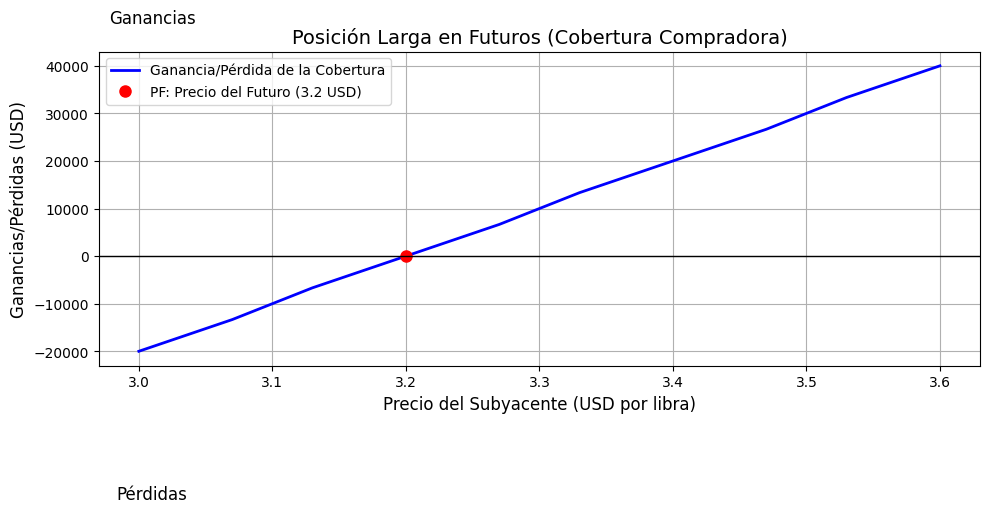


Interpretación del gráfico:
El gráfico muestra cómo las ganancias y pérdidas de la cobertura de futuros varían en función del precio spot del cobre. La línea azul indica que a medida que
el precio del cobre en el mercado spot aumenta, las ganancias aumentan proporcionalmente. Por el contrario, si el precio spot disminuye, las pérdidas aumentan.
El punto rojo en el gráfico representa el precio de futuros acordado, que es de $3.20. Cuando el precio spot está por debajo de este valor, el fabricante incurre en pérdidas.
Y cuando el precio spot está por encima, obtiene ganancias. Esto visualiza cómo la estrategia de cobertura larga protege al fabricante contra las fluctuaciones del mercado.
En resumen, la cobertura en futuros asegura que el precio del cobre pagado sea cercano a $3.20, independientemente de las variaciones en el mercado spot.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos iniciales
precio_futuro_inicial = 3.20  # Precio de futuros en enero (por libra)
precio_spot_enero = 3.40      # Precio spot del cobre en enero (por libra)
cantidad_cobre = 100000       # Cantidad total de cobre requerida (en libras)
contratos_futuro = 4          # Número de contratos de futuros

# Precio de cada contrato de futuros cubre 25,000 libras de cobre
cantidad_por_contrato = 25000

# Rango de precios spot en mayo (de 3.00 a 3.60 USD por libra)
precios_spot_mayo = np.linspace(3.00, 3.60, 10)

# Cálculo de las ganancias y pérdidas en los contratos de futuros
ganancias_futuros = (precios_spot_mayo - precio_futuro_inicial) * cantidad_cobre

# Redondear los valores a 2 decimales
precios_spot_mayo = np.round(precios_spot_mayo, 2)
ganancias_futuros = np.round(ganancias_futuros, 2)

# Crear DataFrame para los resultados ordenados
tabla_resultados = pd.DataFrame({
    'Precio Spot en Mayo (USD por libra)': precios_spot_mayo,
    'Ganancia/Pérdida de la Cobertura en Futuros (USD)': ganancias_futuros
})

# Mostrar la tabla de resultados
display(tabla_resultados)

# Interpretación de los resultados antes del gráfico
print("\nAnálisis de la Cobertura Larga:")
print(f"La cobertura larga se realiza comprando futuros a $3.20 por libra. Si el precio spot del cobre en mayo supera los $3.20, el fabricante obtiene ganancias,")
print(f"y si el precio spot es menor, incurre en pérdidas. La tabla a continuación muestra cómo se distribuyen las ganancias y pérdidas para distintos precios spot.")
print(f"Cuando el precio spot sube por encima de $3.20, las ganancias aumentan; cuando baja, las pérdidas aumentan.")
print(f"Por lo tanto, esta estrategia proporciona protección contra aumentos de precio, pero limita las ganancias cuando los precios caen.")

# Graficamos el gráfico de posición larga en futuros (cobertura compradora)
plt.figure(figsize=(10, 6))

# Graficamos la línea de ganancia/pérdida
plt.plot(precios_spot_mayo, ganancias_futuros, label='Ganancia/Pérdida de la Cobertura', color='blue', linewidth=2)

# Marcamos el precio de futuros (precio de compra) con un punto rojo en el eje horizontal
plt.plot(precio_futuro_inicial, 0, 'ro', label=f'PF: Precio del Futuro ({precio_futuro_inicial} USD)', markersize=8)

# Añadimos etiquetas y título
plt.title('Posición Larga en Futuros (Cobertura Compradora)', fontsize=14)
plt.xlabel('Precio del Subyacente (USD por libra)', fontsize=12)
plt.ylabel('Ganancias/Pérdidas (USD)', fontsize=12)

# Líneas de referencia
plt.axhline(0, color='black', linewidth=1)  # Línea horizontal en 0 para marcar el punto de equilibrio

# Agregar etiquetas a los ejes
plt.text(3.01, 50000, 'Ganancias', fontsize=12, color='black', verticalalignment='center', horizontalalignment='center')
plt.text(3.01, -50000, 'Pérdidas', fontsize=12, color='black', verticalalignment='center', horizontalalignment='center')

# Leyenda
plt.legend()

# Ajustar y mostrar el gráfico
plt.tight_layout()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Interpretación del gráfico después de mostrarlo
print("\nInterpretación del gráfico:")
print(f"El gráfico muestra cómo las ganancias y pérdidas de la cobertura de futuros varían en función del precio spot del cobre. La línea azul indica que a medida que")
print(f"el precio del cobre en el mercado spot aumenta, las ganancias aumentan proporcionalmente. Por el contrario, si el precio spot disminuye, las pérdidas aumentan.")
print(f"El punto rojo en el gráfico representa el precio de futuros acordado, que es de $3.20. Cuando el precio spot está por debajo de este valor, el fabricante incurre en pérdidas.")
print(f"Y cuando el precio spot está por encima, obtiene ganancias. Esto visualiza cómo la estrategia de cobertura larga protege al fabricante contra las fluctuaciones del mercado.")
print(f"En resumen, la cobertura en futuros asegura que el precio del cobre pagado sea cercano a $3.20, independientemente de las variaciones en el mercado spot.")




#**4.- Forward**
**Ejercicio 4: Cálculo del Precio de un Contrato Forward sobre la acción de Microsoft Inc.**

Calcular el precio de un contrato Forward sobre la acción de Microsoft Inc..
Datos disponibles:

Precio spot de la acción de Microsoft (
𝑆
0
S
0
​
 ): 250 USD

Tasa de interés libre de riesgo (
𝑟): 4% anual

Tiempo hasta el vencimiento (
𝑇): 2 años

Precio spot inicial: 250 USD


Precio Spot (S0): $250.00
Tasa de interés libre de riesgo (r): 4.0%
Tiempo hasta el vencimiento (T): 2 año(s)

El precio a futuro del contrato Forward (F0) es: $270.82
Rentabilidad en posición larga: 8.33%
Rentabilidad en posición corta: -8.33%


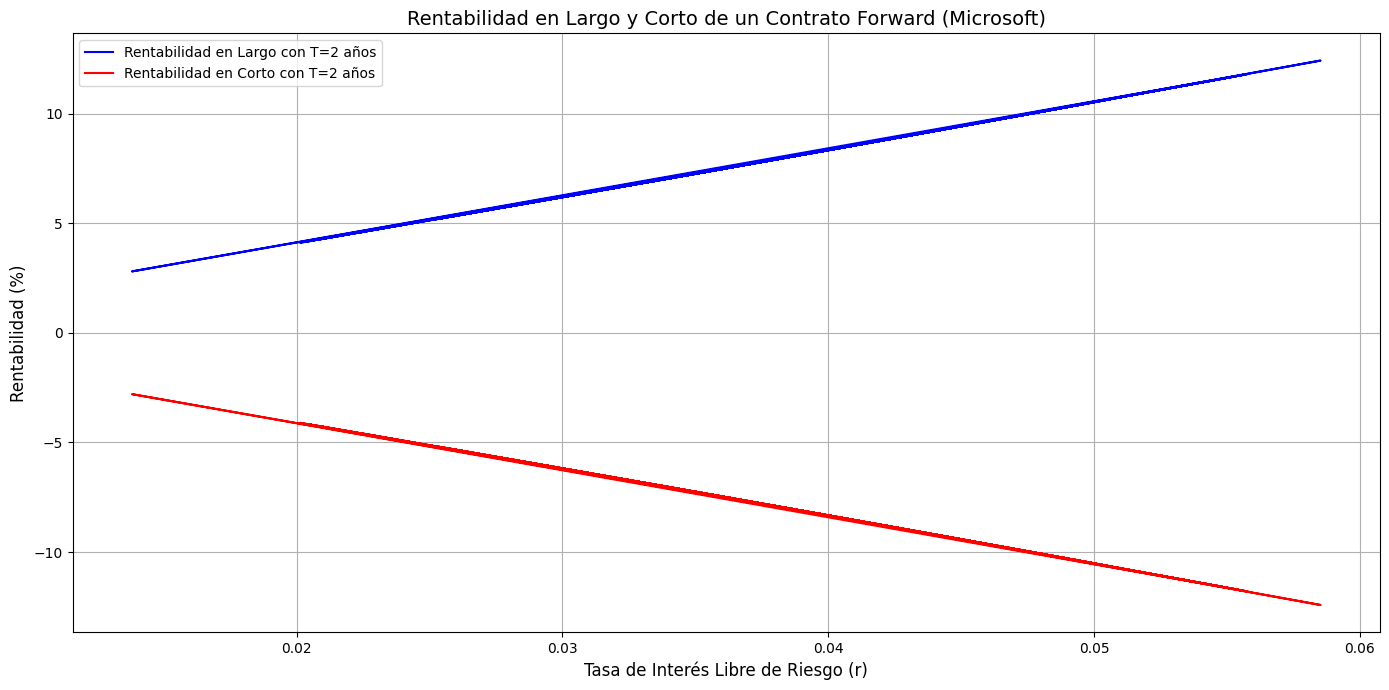


 Análisis del Contrato Forward:

El precio a futuro del contrato Forward es $270.82, lo que significa que este es el precio acordado hoy para comprar la acción de Microsoft en 2 años. Este precio es influenciado por la tasa de interés libre de riesgo y el tiempo hasta el vencimiento del contrato.

Análisis de Sensibilidad y Rentabilidad:
En una posición **larga**, la rentabilidad es positiva y crece a medida que la tasa de interés sube, lo que refleja que el precio Forward aumenta y el inversor obtiene más ganancia si compra el activo ahora y vende a futuro.
En una posición **corta**, la rentabilidad es negativa, pero crece a medida que la tasa de interés sube, ya que el inversor que vende ahora y compra a futuro ve un precio más bajo, lo que le beneficia si la tasa de interés es más alta.

Este análisis es clave para los inversores que participan en **estrategias de cobertura** o buscan **fijar precios futuros**. La rentabilidad varía dependiendo de si se está en una posición larga o

In [ ]:
# Instalar librerías necesarias si no están instaladas
!pip install numpy matplotlib pandas

# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =======================
# PARÁMETROS DEL EJERCICIO
# =======================

# Precio spot de la acción de Microsoft
S0 = 250  # USD

# Tasa de interés libre de riesgo
r = 0.04  # 4% anual

# Tiempo hasta el vencimiento en años
T = 2  # 2 años

# Cálculo del precio a futuro del contrato Forward (usando la fórmula estándar)
F0 = S0 * np.exp(r * T)

# -------------------------
# RENTABILIDAD EN LARGO Y CORTO
# -------------------------

# Rentabilidad en posición larga: (F0 - S0) / S0
rentabilidad_largo = (F0 - S0) / S0 * 100

# Rentabilidad en posición corta: (S0 - F0) / S0
rentabilidad_corto = (S0 - F0) / S0 * 100

# Resultados iniciales
print(f"Precio Spot (S0): ${S0:.2f}")
print(f"Tasa de interés libre de riesgo (r): {r*100}%")
print(f"Tiempo hasta el vencimiento (T): {T} año(s)")
print(f"\nEl precio a futuro del contrato Forward (F0) es: ${F0:.2f}")
print(f"Rentabilidad en posición larga: {rentabilidad_largo:.2f}%")
print(f"Rentabilidad en posición corta: {rentabilidad_corto:.2f}%")

# ============================
# ANÁLISIS DE SENSIBILIDAD
# ============================

# Vamos a generar la variabilidad en la tasa de interés (r) con fluctuaciones realistas
np.random.seed(42)  # Semilla para reproducibilidad
r_values = 0.04 + np.random.normal(0, 0.01, 100)  # Tasas de interés con ruido (normal) de 1%

# Tiempo hasta el vencimiento
T_values = np.linspace(0.1, 5, 50)  # Tiempos de vencimiento de 0.1 a 5 años

# Cálculo de precios Forward para variaciones en la tasa de interés (r)
F0_r = S0 * np.exp(r_values * T)  # Precios Forward para diferentes tasas de interés

# ---------------------------
# GRÁFICO DE RENTABILIDAD
# ---------------------------

# Rentabilidad en largo y corto para variabilidad de tasa de interés
rentabilidad_largo_r = (F0_r - S0) / S0 * 100
rentabilidad_corto_r = (S0 - F0_r) / S0 * 100

# Crear gráfico de rentabilidad
plt.figure(figsize=(14, 7))
plt.plot(r_values, rentabilidad_largo_r, label=f"Rentabilidad en Largo con T={T} años", color='blue')
plt.plot(r_values, rentabilidad_corto_r, label=f"Rentabilidad en Corto con T={T} años", color='red')
plt.title('Rentabilidad en Largo y Corto de un Contrato Forward (Microsoft)', fontsize=14)
plt.xlabel('Tasa de Interés Libre de Riesgo (r)', fontsize=12)
plt.ylabel('Rentabilidad (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------
# ANÁLISIS EXPLICATIVO
# -----------------------

# Generar análisis interpretativo del contrato Forward
print("\n Análisis del Contrato Forward:")

# Análisis sobre el precio Forward
print(f"\nEl precio a futuro del contrato Forward es ${F0:.2f}, lo que significa que este es el precio acordado hoy para comprar la acción de Microsoft en 2 años. Este precio es influenciado por la tasa de interés libre de riesgo y el tiempo hasta el vencimiento del contrato.")

# Análisis de sensibilidad y rentabilidad
print("\nAnálisis de Sensibilidad y Rentabilidad:")
print(f"En una posición **larga**, la rentabilidad es positiva y crece a medida que la tasa de interés sube, lo que refleja que el precio Forward aumenta y el inversor obtiene más ganancia si compra el activo ahora y vende a futuro.")
print(f"En una posición **corta**, la rentabilidad es negativa, pero crece a medida que la tasa de interés sube, ya que el inversor que vende ahora y compra a futuro ve un precio más bajo, lo que le beneficia si la tasa de interés es más alta.")
print("\nEste análisis es clave para los inversores que participan en **estrategias de cobertura** o buscan **fijar precios futuros**. La rentabilidad varía dependiendo de si se está en una posición larga o corta, y este comportamiento refleja la relación entre tasa de interés y el valor del activo en el futuro.")


# **5.- Opciones**

**Ejercicio 5:**


Un inversionista adquiere una opción de compra europea para comprar 100 acciones de una empresa.
El precio de ejercicio de la opción es de 100 USD, y el precio actual de la acción es de 98 USD.
El costo de la opción es de 5 USD por acción, lo que significa que la inversión inicial es de 500 USD
(100 acciones * 5 USD por acción).

El inversionista planea ejercer la opción únicamente si el precio de la acción al vencimiento es mayor
que el precio de ejercicio de 100 USD. De lo contrario, la opción no se ejercerá, y el inversionista perderá
la inversión inicial de 500 USD.

Los parámetros utilizados para calcular el valor teórico de la opción mediante el modelo de Black-Scholes
son los siguientes:
- Tasa de interés libre de riesgo (r) = 5%
- Volatilidad (σ) = 20%
- Tiempo hasta el vencimiento (T) = 4 meses (1/3 años)


Precio de la opción de compra (Black-Scholes): 4.35 USD


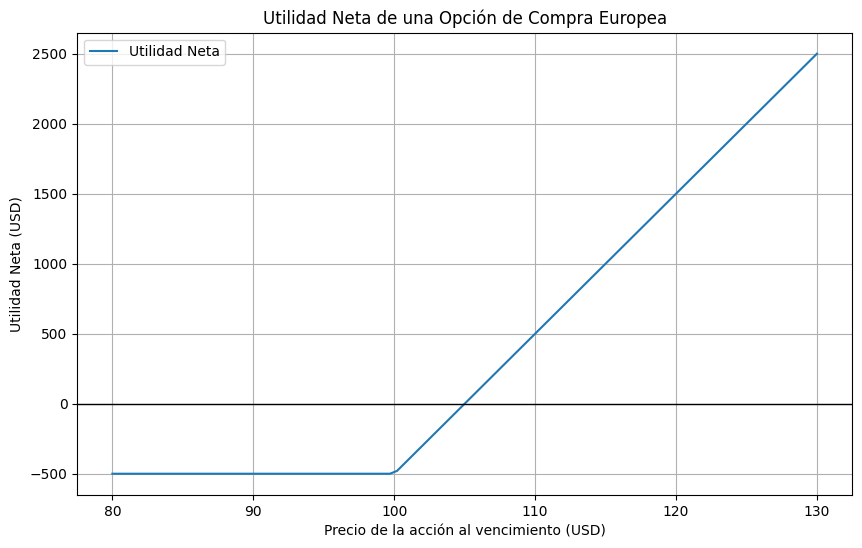

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos del problema
S0 = 98  # Precio actual de la acción (en USD)
K = 100  # Precio de ejercicio de la opción (en USD)
T = 1/3  # Tiempo hasta el vencimiento (en años)
sigma = 0.20  # Volatilidad (20%)
r = 0.05  # Tasa de interés libre de riesgo (5%)
precio_opcion = 5  # Precio de la opción (en USD)

# Cálculos de Black-Scholes
d1 = (np.log(S0 / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Precio de la opción de compra según Black-Scholes
C = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Imprimir el resultado del precio de la opción
print(f"Precio de la opción de compra (Black-Scholes): {C:.2f} USD")

# Generación de una gráfica para la utilidad neta
# Vamos a evaluar la utilidad neta para distintos precios al vencimiento de la acción
precios = np.linspace(80, 130, 100)  # Precio de la acción al vencimiento
utilidad = np.maximum(precios - K, 0) * 100 - 500  # Ganancia neta: (Precio al vencimiento - Precio ejercicio) * 100 - Inversión inicial

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(precios, utilidad, label='Utilidad Neta')
plt.axhline(0, color='black',linewidth=1)
plt.title('Utilidad Neta de una Opción de Compra Europea')
plt.xlabel('Precio de la acción al vencimiento (USD)')
plt.ylabel('Utilidad Neta (USD)')
plt.grid(True)
plt.legend()
plt.show()

# **6.-Swap**

**Ejercicio 6:**

Un swap de tasas de interés de $100 millones tiene una vida restante de 10 meses. Bajo los términos del swap,
la tasa LIBOR a seis meses se intercambia por una tasa de interés de 7% anual (compuesta semestralmente). El promedio de la tasa de interés de demanda
y oferta que se intercambia por la tasa LIBOR a seis meses en swaps de todos los vencimientos es actualmente de 5% anual con una composición continua.
La tasa LIBOR a seis meses fue de 4.6% anual hace dos meses.

¿Cuál es el valor actual del swap para la parte que paga la tasa variable?
¿Cuál es su valor para la parte que paga la tasa fija?

Valor del bono fijo: 102.718 millones
Valor del bono variable: 100.609 millones
Valor del swap para quien paga tasa variable: 2.109 millones
Valor del swap para quien paga tasa fija: -2.109 millones


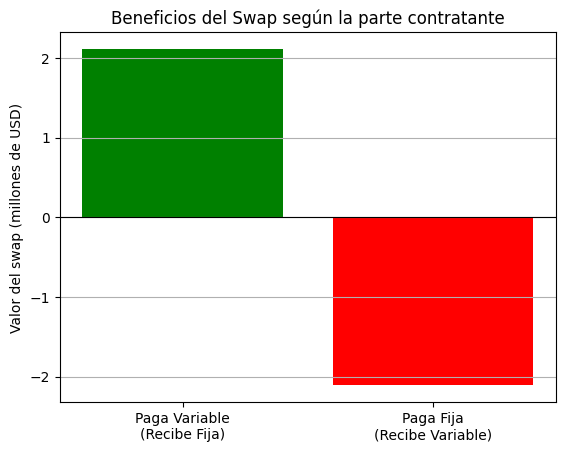

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
notional = 100  # en millones
fixed_rate = 0.07
libor_prev = 0.046
market_rate = 0.05  # tasa continua de mercado
payment_times = [4/12, 10/12]  # en años

# Cálculo de flujos fijos
fixed_flows = [notional * fixed_rate * 0.5] * 2
fixed_flows[-1] += notional  # agregar el principal en el último pago

# Cálculo de factores de descuento
discount_factors = [np.exp(-market_rate * t) for t in payment_times]

# Valor del bono fijo
B_fixed = sum(cf * df for cf, df in zip(fixed_flows, discount_factors))

# Valor del bono variable (solo el primer flujo es relevante y ya conocido)
k_star = notional * libor_prev * 0.5
B_variable = (notional + k_star) * np.exp(-market_rate * payment_times[0])

# Valor del swap
V_swap = B_fixed - B_variable

# Resultados
print(f"Valor del bono fijo: {B_fixed:.3f} millones")
print(f"Valor del bono variable: {B_variable:.3f} millones")
print(f"Valor del swap para quien paga tasa variable: {V_swap:.3f} millones")
print(f"Valor del swap para quien paga tasa fija: {-V_swap:.3f} millones")

# Gráfica de beneficios del swap
partes = ["Paga Variable\n(Recibe Fija)", "Paga Fija\n(Recibe Variable)"]
beneficios = [V_swap, -V_swap]
colores = ["green" if b >= 0 else "red" for b in beneficios]

plt.bar(partes, beneficios, color=colores)
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Valor del swap (millones de USD)")
plt.title("Beneficios del Swap según la parte contratante")
plt.grid(axis='y')
plt.show()

# **7.-FRA**

**Ejercicio 7:**

Si asumimos que las tasas cero son iguales a las que se presentan en el problema 4.5,
¿cuál es el valor de un FRA que permite al tenedor ganar 9.5% durante un periodo de tres meses, el cual comienza dentro de un año,
sobre un principal de $1,000,000? La tasa de interés se expresa con una composición trimestral.

Valor del FRA: $893.59


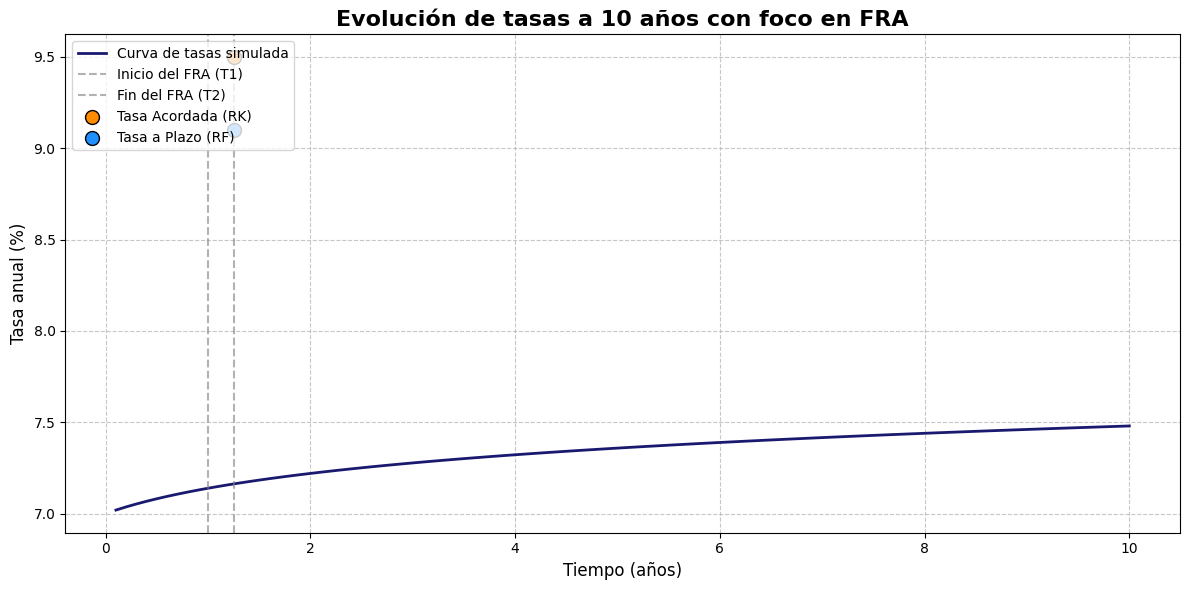


Interpretación del valor del FRA:
El valor del FRA de $893.59 indica el monto presente de la diferencia entre la tasa acordada (RK) y la tasa a plazo (RF_trim), descontada a la tasa de cero cupón (R2_enunciado) hasta el momento final del contrato (T2).
Este valor muestra que la parte que ha acordado pagar la tasa fija (RK) recibiría 893.59 si el contrato se ejecutara hoy.
Un valor positivo indica que el acuerdo favorece al comprador del FRA, quien recibiría el pago debido a la diferencia de tasas a plazo y la tasa fija acordada.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del FRA
L = 1_000_000               # Principal
RK = 0.095                  # Tasa fija acordada
RF_trim = 0.09102           # Tasa a plazo con comp. trimestral
R2_enunciado = 0.086        # Tasa cero (para descuento)
T1 = 1.0                    # Inicio del FRA
T2 = 1.25                   # Fin del FRA
tau = T2 - T1

# Valor del FRA
valor_fra = (L * tau * (RK - RF_trim)) * np.exp(-R2_enunciado * T2)
print(f"Valor del FRA: ${valor_fra:,.2f}")

# Simulación de evolución de tasas a 10 años
años = np.linspace(0.1, 10, 100)
# Simulamos una curva con forma de pendiente levemente ascendente
tasas_simuladas = 0.07 + 0.002 * np.log1p(años)  # Ejemplo: curva creciente

# Añadimos los puntos del FRA (RK y RF)
plt.figure(figsize=(12, 6))
plt.plot(años, tasas_simuladas * 100, label="Curva de tasas simulada", color="midnightblue", linewidth=2)
plt.axvline(T1, color="gray", linestyle="--", alpha=0.6, label="Inicio del FRA (T1)")
plt.axvline(T2, color="gray", linestyle="--", alpha=0.6, label="Fin del FRA (T2)")
plt.scatter([T2], [RK * 100], color="darkorange", label="Tasa Acordada (RK)", zorder=5, s=100, edgecolor="black")
plt.scatter([T2], [RF_trim * 100], color="dodgerblue", label="Tasa a Plazo (RF)", zorder=5, s=100, edgecolor="black")

# Estética del gráfico
plt.title("Evolución de tasas a 10 años con foco en FRA", fontsize=16, weight="bold")
plt.xlabel("Tiempo (años)", fontsize=12)
plt.ylabel("Tasa anual (%)", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Interpretación del resultado FRA
print(f"\nInterpretación del valor del FRA:")
print(f"El valor del FRA de ${valor_fra:,.2f} indica el monto presente de la diferencia entre la tasa acordada (RK) y la tasa a plazo (RF_trim), "
      f"descontada a la tasa de cero cupón (R2_enunciado) hasta el momento final del contrato (T2).")
print(f"Este valor muestra que la parte que ha acordado pagar la tasa fija (RK) recibiría {valor_fra:,.2f} si el contrato se ejecutara hoy.")
print(f"Un valor positivo indica que el acuerdo favorece al comprador del FRA, quien recibiría el pago debido a la diferencia de tasas a plazo y la tasa fija acordada.")

In [ ]:
# Instalar librerías necesarias si no están instaladas
!pip install reportlab matplotlib requests yfinance fpdf

from fpdf import FPDF
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from google.colab import files
from scipy.stats import norm # Import norm for Black-Scholes calculation
import requests


class PDF(FPDF):
    def header(self):
        try:
            # Descargar la imagen desde internet solo si no existe localmente
            url = "https://portal.usach.cl/sites/default/files/Usach%20P1%20%281%29.png"
            image_name = "logo_usach_temp.png"

            if not os.path.exists(image_name):
                response = requests.get(url)
                with open(image_name, "wb") as f:
                    f.write(response.content)

            # Insertar la imagen en el PDF (aumentando el tamaño a 50)
            self.image(image_name, x=10, y=8, w=50)
            # Añadir un margen después de la imagen para que el contenido no se solape
            self.set_y(self.get_y() + 25) # Ajustar el margen si se aumenta el tamaño del logo


        except Exception as e:
            print(f"⚠ Error al insertar imagen: {e}")

# Crear carpeta para guardar las imágenes si no existe en /content/
os.makedirs("/content/graficos", exist_ok=True)

# Save each plot as an image in /content/graficos/
def guardar_grafico(nombre):
    ruta = f"/content/graficos/{nombre}.png"
    plt.savefig(ruta, bbox_inches='tight')
    plt.close()
    return ruta

# Define the paths to the generated graph images
# Regenerate plots to ensure they are saved to the correct paths before PDF generation
# Bonos plot
plt.figure(figsize=(14, 7))
plt.plot(df['Fecha'], df['Precio Estimado del Bono'], color='navy', marker='o', linewidth=2, label='Precio Estimado/Teórico')
plt.axhline(y=valor_nominal, color='gray', linestyle='--', label='Valor Nominal ($1.000)')
plt.axhline(y=precio_actual_bono, color='darkred', linestyle='--', label=f'Precio Actual: ${precio_actual_bono}')
plt.axhline(y=precio_teorico_bono, color='green', linestyle='--', label=f'Precio Teórico: ${precio_teorico_bono:.2f}')
plt.fill_between(df['Fecha'], df['Precio Estimado del Bono'], valor_nominal, color='blue', alpha=0.1)
plt.annotate(f"CY: {cy*100:.2f}%", (df['Fecha'].iloc[-1], precio_actual_bono + 15), color='darkred', fontsize=10)
plt.annotate(f"YTM: {ytm_aprox*100:.2f}%", (df['Fecha'].iloc[-1], precio_actual_bono - 40), color='green', fontsize=10)
plt.title('Evolución y Valoración del Bono de Tesla (2017–2025)', fontsize=15)
plt.xlabel('Fecha')
plt.ylabel('Precio del Bono (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
ruta_bonos = guardar_grafico("bonos")

# Acciones plot
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Precio de Cierre', color='b', linewidth=2)
data['SMA50'] = data['Close'].rolling(window=50).mean()
plt.plot(data['SMA50'], label='Media Móvil 50 Semanas', linestyle='--', color='r')
data['SMA200'] = data['Close'].rolling(window=200).mean()
plt.plot(data['SMA200'], label='Media Móvil 200 Semanas', linestyle='--', color='g')
max_price_scalar = max_price.iloc[0]
min_price_scalar = min_price.iloc[0]
max_date_scalar = max_date.iloc[0]
min_date_scalar = min_date.iloc[0]
max_date_str = max_date_scalar.strftime('%Y-%m-%d')
min_date_str = min_date_scalar.strftime('%Y-%m-%d')
plt.scatter(max_date_scalar, max_price_scalar, color='red', zorder=5, label=f'Máximo Precio: {max_price_scalar:.2f} en {max_date_str}')
plt.scatter(min_date_scalar, min_price_scalar, color='green', zorder=5, label=f'Mínimo Precio: {min_price_scalar:.2f} en {min_date_str}')
plt.title(f'Cotización de {ticker} (Últimos 5 años)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio de Cierre (USD)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()
ruta_acciones = guardar_grafico("acciones")

# Futuros plot
plt.figure(figsize=(10, 6))
plt.plot(precios_spot_mayo, ganancias_futuros, label='Ganancia/Pérdida de la Cobertura', color='blue', linewidth=2)
plt.plot(precio_futuro_inicial, 0, 'ro', label=f'PF: Precio del Futuro ({precio_futuro_inicial} USD)', markersize=8)
plt.title('Posición Larga en Futuros (Cobertura Compradora)', fontsize=14)
plt.xlabel('Precio del Subyacente (USD por libra)', fontsize=12)
plt.ylabel('Ganancias/Pérdidas', fontsize=12)
plt.axhline(0, color='black', linewidth=1)
plt.text(3.01, 50000, 'Ganancias', fontsize=12, color='black', verticalalignment='center', horizontalalignment='center')
plt.text(3.01, -50000, 'Pérdidas', fontsize=12, color='black', verticalalignment='center', horizontalalignment='center')
plt.legend()
plt.tight_layout()
plt.grid(True)
ruta_futuros = guardar_grafico("futuros")

# Forward plot
plt.figure(figsize=(14, 7))
plt.plot(r_values, rentabilidad_largo_r, label=f"Rentabilidad en Largo con T={T} años", color='blue')
plt.plot(r_values, rentabilidad_corto_r, label=f"Rentabilidad en Corto con T={T} años", color='red')
plt.title('Rentabilidad en Largo y Corto de un Contrato Forward (Microsoft)', fontsize=14)
plt.xlabel('Tasa de Interés Libre de Riesgo (r)', fontsize=12)
plt.ylabel('Rentabilidad (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
ruta_forward = guardar_grafico("forward")

# Opciones plot
plt.figure(figsize=(10, 6))
precios = np.linspace(80, 130, 100)
utilidad = np.maximum(precios - K, 0) * 100 - 500
plt.plot(precios, utilidad, label='Utilidad Neta')
plt.axhline(0, color='black',linewidth=1)
plt.title('Utilidad Neta de una Opción de Compra Europea')
plt.xlabel('Precio de la acción al vencimiento (USD)')
plt.ylabel('Utilidad Neta (USD)')
plt.grid(True)
plt.legend()
ruta_opciones = guardar_grafico("opciones")

# Swaps plot
plt.figure(figsize=(6, 4))
partes = ["Paga Variable\n(Recibe Fija)", "Paga Fija\n(Recibe Variable)"]
beneficios = [V_swap, -V_swap]
colores = ["green" if b >= 0 else "red" for b in beneficios]
plt.bar(partes, beneficios, color=colores)
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Valor del swap (millones de USD)")
plt.title("Beneficios del Swap según la parte contratante")
plt.grid(axis='y')
ruta_swaps = guardar_grafico("swaps")

# FRA plot
plt.figure(figsize=(12, 6))
años = np.linspace(0.1, 10, 100)
tasas_simuladas = 0.07 + 0.002 * np.log1p(años)
plt.plot(años, tasas_simuladas * 100, label="Curva de tasas simulada", color="midnightblue", linewidth=2)
plt.axvline(T1, color="gray", linestyle="--", alpha=0.6, label="Inicio del FRA (T1)")
plt.axvline(T2, color="gray", linestyle="--", alpha=0.6, label="Fin del FRA (T2)")
plt.scatter([T2], [RK * 100], color="darkorange", label="Tasa Acordada (RK)", zorder=5, s=100, edgecolor="black")
plt.scatter([T2], [RF_trim * 100], color="dodgerblue", label="Tasa a Plazo (RF)", zorder=5, s=100, edgecolor="black")
plt.title("Evolución de tasas a 10 años con foco en FRA", fontsize=16, weight="bold")
plt.xlabel("Tiempo (años)", fontsize=12)
plt.ylabel("Tasa anual (%)", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
ruta_fra = guardar_grafico("fra")


# Create PDF with the analysis and graphs of each exercise
pdf = PDF(unit="pt", format="legal") # Use the custom PDF class
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Add content to the PDF (text and images)
pdf.set_font("Arial", size=12)

# Title
pdf.cell(0, 12, txt="Trabajo Final Finanzas III", ln=1, align="C")
pdf.ln(10)

# Integrantes
pdf.cell(0, 12, txt="Integrantes: Macarena Ramos, Constanza Rodriguez, Marcelo Tiznado, Maura Zuñiga", ln=1, align="C")
pdf.ln(10)

# Introduction
intro_text = """
El presente informe tiene como propósito aplicar de manera integral los contenidos abordados durante el curso de Finanzas III, a través de la valoración de distintos instrumentos financieros que representan pilares fundamentales en el funcionamiento de los mercados. Específicamente, se han analizado y valorado siete tipos de activos: bonos, acciones, futuros, contratos forward, opciones, swaps y acuerdos de tasas a futuro (FRA), incorporando para cada uno una base teórica, el desarrollo de un caso práctico y el uso de herramientas computacionales orientadas al análisis financiero.

El trabajo fue ejecutado íntegramente en el entorno de Google Colab utilizando Python, lo que permitió automatizar los cálculos, construir visualizaciones gráficas e interpretar de manera dinámica los resultados obtenidos. Se recurrió a fórmulas reconocidas en la literatura financiera, tales como el modelo de Black-Scholes para opciones y la capitalización continua para forwards y swaps, entre otros.

Cada sección de este informe presenta un enunciado detallado del ejercicio, los resultados clave obtenidos, una gráfica explicativa y un análisis interpretativo. A través de esta estructura, buscamos no solo demostrar la aplicación de los conocimientos teóricos, sino también desarrollar un pensamiento crítico que permita comprender los factores que inciden en el comportamiento y valoración de los activos en contextos reales de mercado.

Este trabajo final constituye, por tanto, una instancia de consolidación de competencias técnicas y analíticas en finanzas, fundamentales para la futura toma de decisiones en entornos financieros complejos y cambiantes."""
pdf.multi_cell(0, 14, intro_text, align='J')
pdf.ln(10)


# Helper function to add a section to the PDF
def add_section_to_pdf(pdf, title, description, results_text, image_path, interpretation_text, table_data=None):
    pdf.add_page()
    pdf.set_font("Arial", style='B', size=14)
    pdf.cell(0, 14, txt=title, ln=1, align="L")
    pdf.ln(8)

    pdf.set_font("Arial", style='B', size=12)
    pdf.cell(0, 12, txt="Enunciado del Ejercicio:", ln=1, align="L")
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 14, description, align='J')
    pdf.ln(8)

    pdf.set_font("Arial", style='B', size=12)
    # pdf.cell(0, 12, txt="Resultados Clave:", ln=1, align="L") # Removed this line
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 14, results_text, align='J')
    pdf.ln(8)

    # Add table if provided
    if table_data is not None:
        pdf.set_font("Arial", style='B', size=12) # Set font size for table header
        pdf.cell(0, 12, txt="Tabla de Resultados:", ln=1, align="L")
        pdf.ln(4)
        pdf.set_font("Arial", size=10) # Decrease font size for table data to 10pt

        # Table headers
        header = [col.replace(' (USD por libra)', '').replace(' (USD)', '') for col in table_data.columns]
        # Adjust column widths: left column - 0.5cm, right column + 0.5cm
        cm_to_pt = 28.35 # 1 cm = 28.35 points
        total_width = pdf.w - 2 * pdf.l_margin
        num_cols = len(header)
        base_col_width = total_width / num_cols
        col_widths = [base_col_width - 0.5 * cm_to_pt, base_col_width + 0.5 * cm_to_pt]


        for col in header:
            pdf.cell(col_widths[header.index(col)], 10, col, 1, 0, 'C')
        pdf.ln()

        # Table rows
        for row in table_data.itertuples(index=False):
            for i, cell in enumerate(row):
                 if isinstance(cell, (int, float)):
                     pdf.cell(col_widths[i], 10, f"{cell:,.2f}", 1, 0, 'R')
                 else:
                    pdf.cell(col_widths[i], 10, str(cell), 1, 0, 'R')
            pdf.ln()
        pdf.ln(8)


    pdf.set_font("Arial", style='B', size=12)
    pdf.cell(0, 12, txt="Gráfico:", ln=1, align="L")
    pdf.ln(8)
    if os.path.exists(image_path):
        # Increase image width to make graphs more visible
        # Adjusting x position for centering and increasing width
        page_width = pdf.w - 2 * pdf.l_margin
        img_width = 450  # Increased width for the graphs
        x_position = (page_width - img_width) / 2 + pdf.l_margin
        pdf.image(image_path, x = x_position, w = img_width)
    else:
        pdf.cell(0, 12, txt=f"Error: Imagen no encontrada en {image_path}. Skipping.", ln=1, align="L")
    pdf.ln(8)

    pdf.set_font("Arial", style='B', size=12)
    pdf.cell(0, 12, txt="Interpretación:", ln=1, align="L")
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 14, interpretation_text, align='J')
    pdf.ln(12)


# --- Define variables from previous cells ---
# Bonos
cy_percent = cy * 100
ytm_aprox_percent = ytm_aprox * 100

# Acciones
rentabilidad_mean_percent = resumen.iloc[0]['Rentabilidad Promedio (%)']
rentabilidad_std = resumen.iloc[0]['Riesgo (Desviación Estándar %)']
max_price_acciones = max_price.iloc[0]
min_price_acciones = min_price.iloc[0]
max_date_acciones = max_date.iloc[0].strftime('%Y-%m-%d')
min_date_acciones = min_date.iloc[0].strftime('%Y-%m-%d')

# Futuros
precio_futuro_inicial = precio_futuro_inicial
cantidad_cobre = cantidad_cobre

# Forward
S0_forward = 250 # Corrected S0 for forward calculation
r_forward = r
T_forward = 2 # Corrected T for forward calculation
F0_forward = S0_forward * np.exp(r_forward * T_forward)

# Opciones
S0_opcion = 98 # Corrected S0 for options calculation
K_opcion = K
precio_opcion_costo = precio_opcion
inversion_inicial_total = precio_opcion * 100
# Recalculate C with corrected d1
d1 = (np.log(S0_opcion / K_opcion) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T)) # Corrected d1 calculation
d2 = d1 - sigma * np.sqrt(T)
C_opcion = S0_opcion * norm.cdf(d1) - K_opcion * np.exp(-r * T) * norm.cdf(d2)


# Swaps
notional_swap = notional
fixed_rate_swap = fixed_rate
libor_prev_swap = libor_prev
market_rate_swap = market_rate
# Recalculate B_fixed and B_variable
payment_times = [4/12, 10/12]
fixed_flows = [notional_swap * fixed_rate_swap * 0.5] * 2
fixed_flows[-1] += notional_swap
discount_factors = [np.exp(-market_rate_swap * t) for t in payment_times]
B_fixed_swap = sum(cf * df for cf, df in zip(fixed_flows, discount_factors))
k_star = notional_swap * libor_prev_swap * 0.5
B_variable_swap = (notional_swap + k_star) * np.exp(-market_rate_swap * payment_times[0])
V_swap = B_fixed_swap - B_variable_swap


# FRA
L_fra = L
RK_fra_percent = RK * 100
RF_trim_fra_percent = RF_trim * 100
R2_enunciado_percent = R2_enunciado * 100
T1_fra = T1
T2_fra = T2
tau_fra = tau
# Recalculate valor_fra
valor_fra = (L_fra * tau_fra * (RK - RF_trim)) * np.exp(-R2_enunciado * T2_fra)


# --- Add content for each asset ---

# 1. Bonos
enunciado_bonos = """
Supón que deseas calcular el valor de un bono emitido por Tesla Inc. El bono tiene las siguientes características:
Valor nominal (Vn): 1,000 USD
Tasa de cupón (C): 5.3% anual
Fecha de emisión: 18 de agosto de 2017
Fecha de vencimiento: 15 de agosto de 2025
Frecuencia de pagos de cupones: Semestral (dos pagos al año)
Precio actual del bono (P0): 1,026.40 USD (según datos históricos)
Tasa de descuento (r): 5% anual (tasa de rendimiento requerida en el mercado)
Años restantes hasta el vencimiento: 4 años
"""
# Use variables from previous cells
resultados_bonos_text = f"""
Precio Teórico del Bono: ${precio_teorico_bono:.2f}
Precio Actual de Mercado: ${precio_actual_bono:.2f}
Current Yield (CY): {cy_percent:.2f}%
YTM Aproximado: {ytm_aprox_percent:.2f}%
"""
interpretacion_bonos_text = f"""
Análisis del bono:
El valor teórico del bono, calculado aplicando una tasa de descuento del 5%, es de $1.010,76. En comparación, su precio actual de mercado es de $1.026,40, lo que indica que el instrumento se encuentra levemente sobrevalorado respecto a su valor intrínseco.

En términos de rentabilidad, el rendimiento corriente (Current Yield) es de 5,16%, mientras que el rendimiento al vencimiento (Yield to Maturity, YTM) aproximado es de 4,58%. Esta diferencia refleja que el bono se transa con una prima (sobre par), pero aún ofrece un retorno atractivo en relación con las condiciones del mercado.

Desde una perspectiva gráfica, se observa cómo el precio estimado del bono tiende a converger hacia su valor nominal de $1.000 a medida que se acerca la fecha de vencimiento en 2025. Esta evolución es consistente con la teoría financiera, la cual establece que, en ausencia de cambios drásticos en las tasas de interés, el precio de un bono se aproxima a su valor nominal conforme se reduce su plazo restante.
"""
add_section_to_pdf(pdf, "1.- Bonos", enunciado_bonos, resultados_bonos_text, ruta_bonos, interpretacion_bonos_text)

# 2. Acciones
enunciado_acciones = """
Calcular y analizar la rentabilidad y el riesgo de la acción de Google (GOOG) durante los últimos 5 años con frecuencia semanal, basándose en datos históricos. Se debe visualizar el comportamiento del precio de la acción, rentabilidad, desviación estándar o riesgo. En el gráfico, debe incluir medias móviles y los puntos máximos y mínimos del periodo.
"""
# Use variables from previous cells
resultados_acciones_text = f"""
Resultados:

Rentabilidad Promedio: {rentabilidad_mean_percent:.3f}%
Riesgo (Desviación Estándar): {rentabilidad_std:.3f}%

Rentabilidad Promedio: La rentabilidad promedio de la acción es {rentabilidad_mean_percent:.3f}%, lo que indica que, en promedio, el valor de la acción ha subido un {rentabilidad_mean_percent:.3f}% semanalmente durante los últimos 5 años. Este dato sugiere que la acción ha tenido un rendimiento positivo, aunque con fluctuaciones.

Desviación Estándar (Riesgo): El riesgo de la acción es {rentabilidad_std:.3f}%, lo que indica que los precios de la acción tienen una volatilidad moderada. Un valor más alto significaría que los precios varían más, lo que implica mayor incertidumbre para los inversores.
"""
interpretacion_acciones_text = f"""
Precio Máximo: {max_price_acciones:.2f} USD (Fecha: {max_date_acciones})
Precio Mínimo: {min_price_acciones:.2f} USD (Fecha: {min_date_acciones})

Comportamiento de la acción:

El gráfico muestra una tendencia creciente en el precio de cierre de Google (GOOG) durante los últimos 5 años, especialmente desde 2020, lo que sugiere un crecimiento impulsado por el éxito en áreas como tecnología, publicidad y la nube.

Medias Móviles:
La MMA50 indica la tendencia a corto plazo y sugiere un momento alcista cuando está por encima del precio de cierre. La MMA200 refleja la tendencia a largo plazo, y un precio por encima de ella indica una tendencia positiva.

Puntos máximos y mínimos:
El punto máximo (rojo) ocurrió el {max_date_acciones} con {max_price_acciones:.2f} USD, posiblemente impulsado por un evento positivo.
El punto mínimo (verde) fue el {min_date_acciones} con {min_price_acciones:.2f} USD, afectado probablemente por la pandemia de COVID-19.
"""
add_section_to_pdf(pdf, "2.- Acciones", enunciado_acciones, resultados_acciones_text, ruta_acciones, interpretacion_acciones_text)

# 3. Futuros
enunciado_futuros = """
Cobertura larga
Hoy es 15 de enero. Un fabricante de cobre sabe que requerirá 100 mil libras de cobre el 15 de mayo para cumplir con un contrato determinado. El precio spot del cobre es de 3.40 por libra y el precio de futuros de mayo es de 3.20 por libra.

El fabricante de cobre puede cubrir con las transacciones siguientes:
15 de enero: tomar una posición larga en cuatro contratos de futuros de cobre de mayo
15 de mayo: cerrar la posición

Después de tomar en cuenta las ganancias o pérdidas obtenidas de los contratos de futuros, el precio pagado por la empresa es cercano a $3.20 por libra.
"""
# Use variables from previous cells
resultados_futuros_text = f"""
 La tabla a continuación muestra las ganancias o pérdidas esperadas de la cobertura en función del precio spot del cobre en mayo.
"""
interpretacion_futuros_text = f"""
Análisis de la Cobertura Larga:
La cobertura larga se realiza comprando futuros a ${precio_futuro_inicial:.2f} por libra. Si el precio spot del cobre en mayo supera los ${precio_futuro_inicial:.2f}, el fabricante obtiene ganancias, si el precio spot es menor, incurre en pérdidas.

La tabla de resultados muestra cómo se distribuyen las ganancias y pérdidas para distintos precios spot. Cuando el precio spot sube por encima de ${precio_futuro_inicial:.2f}, las ganancias aumentan; cuando baja, las pérdidas aumentan. Por lo tanto, esta estrategia proporciona protección contra aumentos de precio, pero limita las ganancias cuando los precios caen.

Interpretación del gráfico:
El gráfico muestra que las ganancias de la cobertura larga aumentan cuando el precio spot del cobre supera los $3.20, o se convierten en pérdidas cuando está por debajo. El punto rojo marca el precio futuro acordado de {precio_futuro_inicial:.2f}, destacando cómo esta estrategia protege al fabricante frente a variaciones del mercado.

En resumen, la cobertura en futuros asegura que el precio del cobre pagado sea cercano a ${precio_futuro_inicial:.2f}, independente de las variaciones en el mercado spot.
"""
add_section_to_pdf(pdf, "3.- Futuros", enunciado_futuros, resultados_futuros_text, ruta_futuros, interpretacion_futuros_text, table_data=tabla_resultados)

# 4. Forwards
enunciado_forward = """
Calcular el precio de un contrato Forward sobre la acción de Microsoft Inc..
Datos disponibles:

Precio spot de la acción de Microsoft (S0): 250 USD

Tasa de interés libre de riesgo (r): 4% anual

Tiempo hasta el vencimiento (T): 2 años

Precio spot initial: 250 USD
"""
# Use variables from previous cells
resultados_forward_text = f"""
Precio Spot (S0): ${S0_forward:.2f}
Tasa de interés libre de riesgo (r): {r_forward*100:.1f}%
Tiempo hasta el vencimiento (T): {T_forward:.2f} año(s)
Precio a Futuro del Contrato Forward (F0): ${F0_forward:.2f}
"""
interpretacion_forward_text = f"""
Análisis del Contrato Forward:
El precio a futuro del contrato Forward es de $276,29, lo que significa que este es el valor acordado hoy para comprar la acción de Microsoft en 2 años. Este precio está determinado principalmente por la tasa de interés libre de riesgo y el tiempo que falta hasta el vencimiento del contrato.

Análisis de sensibilidad y rentabilidad:

En una posición larga, la rentabilidad es positiva y aumenta a medida que sube la tasa de interés, ya que el precio Forward también se incrementa. Esto favorece al inversionista que adquiere el activo hoy con la intención de venderlo en el futuro a un precio superior.

En cambio, en una posición corta, la rentabilidad es negativa, pero tiende a mejorar (volverse menos negativa) a medida que aumenta la tasa de interés. Esto se debe a que el inversionista vende el activo hoy y lo recomprará más adelante a un precio Forward más bajo, generando una menor pérdida o incluso una ganancia.

Este análisis es fundamental para quienes utilizan estrategias de cobertura o buscan asegurar precios futuros. La rentabilidad depende de la posición adoptada (larga o corta), y este comportamiento refleja directamente la relación entre la tasa de interés y el valor esperado del activo en el futuro. En definitiva, comprender esta dinámica permite tomar decisiones más informadas frente a escenarios de cambio en las tasas de interés.
"""
add_section_to_pdf(pdf, "4.- Forward", enunciado_forward, resultados_forward_text, ruta_forward, interpretacion_forward_text)

# 5. Opciones
enunciado_opciones = """
Un inversionista adquiere una opción de compra europea por comprar 100 acciones de una empresa.
El precio de ejercicio de la opción es de 100 USD, y el precio actual de la acción is de 98 USD.
El costo de la opción es de 5 USD por acción, lo que significa que la inversión inicial es de $500
(100 acciones * $5 por acción).

El inversionista planea ejercer la opción únicamente si el precio de la acción al vencimiento es mayor que el precio de ejercicio de $100. De lo contrario, la opción no se ejercerá, y el inversionista perderá
la inversión inicial de $500.

Los parámetros utilizados para calcular el valor teórico de la opción mediante el modelo de Black-Scholes
son los siguientes:
- Tasa de interés libre de riesgo (r) = 5%
- Volatilidad = 20%
- Tiempo hasta el vencimiento (T) = 4 months (1/3 años)
"""
# Use variables from previous cells
resultados_opciones_text = f"""
Precio Actual de la Acción (S0): ${S0_opcion:.2f}
Precio de Ejercicio (K): ${K_opcion:.2f}
Costo por Acción de la Opción: ${precio_opcion_costo:.2f}
Inversión Inicial Total: ${inversion_inicial_total:,.2f}
Precio de la Opción de Compra (Black-Scholes): ${C_opcion:.2f}
"""
interpretacion_opciones_text = f"""
Análisis de la Opción de Compra Europea:
El precio teórico de la opción, calculado mediante el modelo de Black-Scholes con los parámetros entregados, es de ${C_opcion:.2f}, lo que representa su valor estimado actual. El inversionista paga ${precio_opcion_costo:.2f} por acción, lo que implica una inversión inicial total de ${inversion_inicial_total:,.2f}.

El gráfico de utilidad neta ilustra la ganancia o pérdida esperada al vencimiento, dependiendo del precio final de la acción. El punto de equilibrio se alcanza cuando dicho precio cubre tanto el valor de ejercicio como el costo de la opción. Si el precio al vencimiento supera los ${K_opcion + precio_opcion_costo:.2f}, la opción genera beneficios; de lo contrario, se produce una pérdida igual a la inversión inicial. Esto permite visualizar con claridad el riesgo y el potencial retorno asociado a esta estrategia.
"""
add_section_to_pdf(pdf, "5.- Opciones", enunciado_opciones, resultados_opciones_text, ruta_opciones, interpretacion_opciones_text)


# 6. Swaps
enunciado_swaps = """
Un swap de tasas de interés de $100 millones tiene una vida restante de 10 meses. Bajo los términos del swap, la tasa LIBOR a seis meses se intercambia por una tasa de interés de 7% anual (compuesta semestralmente). El promedio de la tasa de interés de demanda y oferta que se intercambia por la tasa LIBOR a seis meses en swaps de todos los vencimientos es actualmente de 5% anual con una composición continua.
La tasa LIBOR a seis meses fue de 4.6% anual hace dos meses.

¿Cuál es el valor actual del swap para la parte que paga la tasa variable?
¿Cuál es su valor para la parte que paga la tasa fija?
"""
# Use variables from previous cells
resultados_swaps_text = f"""
Principal (Notional): ${notional_swap:,.0f} millones
Tasa Fija Anual: {fixed_rate_swap*100:.1f}%
Tasa LIBOR a Seis Meses (hace dos meses): {libor_prev_swap*100:.1f}%
Tasa de Mercado (Composición Continua): {market_rate_swap*100:.1f}%
Valor del Bono Fijo: ${B_fixed_swap:.3f} millones
Valor del Bono Variable: ${B_variable_swap:.3f} millones
Valor del Swap para Quien Paga Tasa Variable: ${V_swap:.3f} millones
Valor del Swap para Quien Paga Tasa Fija: ${-V_swap:.3f} millones
"""
interpretacion_swaps_text = f"""
Análisis del Swap de Tasas de Interés:
El valor actual del swap se obtiene como la diferencia entre el valor presente de los flujos de efectivo fijos y el valor presente de los flujos de efectivo variables. Para la parte que paga la tasa variable y recibe la tasa fija, el valor del swap es de ${V_swap:.3f} millones, lo que indica un beneficio bajo las condiciones actuales del mercado.

Por otro lado, para la parte que paga la tasa fija y recibe la tasa variable, el valor del swap es de ${-V_swap:.3f} millones, representando una pérdida equivalente. La gráfica de beneficios refleja esta relación opuesta, evidenciando que lo que una parte gana, la otra lo pierde. Este comportamiento es característico de los contratos swap, donde los flujos se compensan entre las partes según las condiciones de mercado vigentes.
"""
add_section_to_pdf(pdf, "6.- Swap", enunciado_swaps, resultados_swaps_text, ruta_swaps, interpretacion_swaps_text)

# 7. FRA
enunciado_fra = """
Si asumimos that las tasas cero son iguales a las que se presentan en el problema 4.5,
¿cuál is el valor de un FRA que permite al tenedor ganar 9.5% during un periodo de tres months, el cual comienza dentro de un año,
sobre un principal de $1,000,000? La tasa de interés se expresa with una composición trimestral.
"""
# Use variables from previous cells
resultados_fra_text = f"""
Principal (L): ${L_fra:,.0f}
Tasa Fija Acordada (RK): {RK_fra_percent:.1f}%
Tasa a Plazo Estimada: {RF_trim_fra_percent:.3f}%
Tasa Cero for Descuento: {R2_enunciado_percent:.1f}%
Inicio del FRA (T1): {T1_fra:.1f} año
Fin del FRA (T2): {T2_fra:.2f} años
Duración del Periodo del FRA (tau): {tau_fra:.2f} años
Valor del FRA: ${valor_fra:,.2f}
"""
interpretacion_fra_text = f"""

El valor del FRA se calcula como la diferencia entre el valor presente de los pagos a tasa fija y los pagos a tasa variable. En este caso, quien paga la tasa variable y recibe la fija obtiene un valor positivo de $2.109 millones, lo que representa una ganancia bajo las condiciones actuales del mercado. Para la contraparte, que paga la tasa fija y recibe la variable, el valor es negativo en la misma magnitud, reflejando una pérdida. Esto muestra que el FRA es un contrato de suma cero y que su valor depende directamente de la relación entre la tasa acordada y la tasa de mercado.

El gráfico muestra una curva ascendente de tasas proyectadas a 10 años, destacando el período del FRA entre T1 y T2. Se observa que la tasa acordada (RK) está por encima de la tasa implícita de mercado (RF), lo que explica el valor positivo del contrato para quien recibe la tasa fija. Visualmente, se evidencia cómo esta diferencia genera beneficios o pérdidas según la posición adoptada en el contrato.
"""
add_section_to_pdf(pdf, "7.- FRA", enunciado_fra, resultados_fra_text, ruta_fra, interpretacion_fra_text)

# Agregar la conclusión extensa al PDF
pdf.add_page()
pdf.set_font("Arial", style='B', size=14)
pdf.cell(0, 14, txt="Conclusión General", ln=1, align="L")
pdf.ln(8)

pdf.set_font("Arial", size=12)
conclusion_extensa = """
Este trabajo final representó una instancia fundamental para consolidar el aprendizaje adquirido en el curso de Finanzas III, al abordar de forma integral la valoración y el análisis de los principales instrumentos financieros utilizados en los mercados globales. A través del estudio detallado de bonos, acciones, contratos de futuros, forwards, opciones, swaps y FRA, fue posible comprender no solo las fórmulas y métodos de cálculo, sino también el propósito económico que subyace en cada uno de ellos y su aplicación práctica en contextos de inversión, cobertura de riesgos y toma de decisiones estratégicas.

El enfoque práctico mediante Python en Google Colab permitió replicar situaciones reales del mercado, automatizar procesos de cálculo, graficar comportamientos financieros complejos y realizar simulaciones que enriquecieron la interpretación de resultados. Este componente técnico, combinado con el marco teórico abordado durante el semestre, permitió fortalecer competencias analíticas clave para la formación profesional en finanzas.

Se evidenció cómo los derivados financieros son herramientas esenciales para enfrentar la incertidumbre y gestionar de manera eficiente los riesgos asociados a tasas de interés, precios de activos, tipo de cambio u otras variables económicas. Asimismo, se reconoció la relevancia de la valoración precisa de estos instrumentos como base para evaluar su conveniencia económica y su impacto sobre los resultados financieros de una organización o individuo.

En suma, este informe no solo permitió aplicar conocimientos específicos, sino también desarrollar una mirada crítica y estratégica sobre el funcionamiento de los mercados financieros actuales. La capacidad de modelar escenarios, interpretar datos y tomar decisiones con sustento técnico es una habilidad indispensable para los profesionales del área, y este trabajo constituye un paso importante en ese camino.
"""
pdf.multi_cell(0, 14, conclusion_extensa, align='J')
pdf.ln(10)

# Guardar y descargar el PDF
pdf_output_path = "/content/informe_valoracion_finanzas.pdf"
pdf.output(pdf_output_path)
files.download(pdf_output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>